# **Autoencoder in Keras: Using Dense Fully Connected layers**

In [0]:
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

Visualizing data

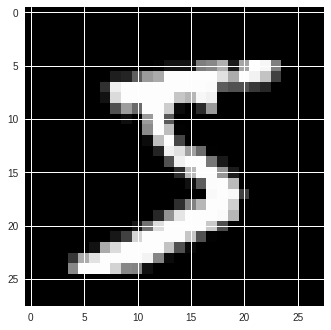

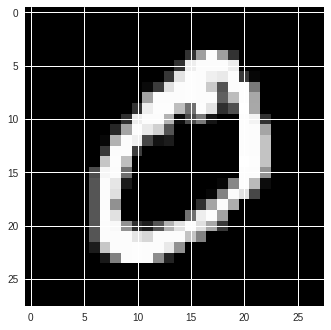

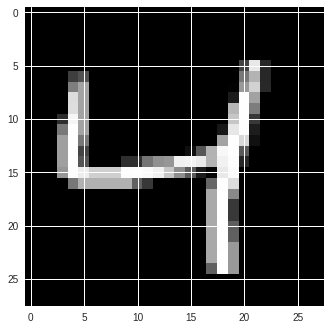

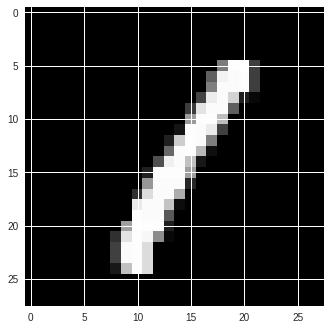

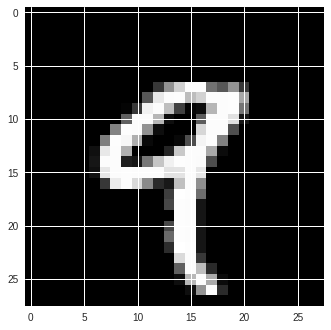

In [115]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#visualizing data to see how the digits look 
for i in [0,1,2,3,4]:
    plt.figure()
    plt.imshow(x_train[i].reshape(28,28))
    plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential ([
    Dense(1000, input_shape=(784,)),
    Activation('relu'),
    Dense(500),
    Activation('relu'),
    Dense(250),
    Activation('relu'),
    Dense(500),
    Activation('relu'),
    Dense(1000), 
    Activation('relu'),
    Dense(784),
    Activation('relu')
])

In [117]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1000)              785000    
_________________________________________________________________
activation_67 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 500)               500500    
_________________________________________________________________
activation_68 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 250)               125250    
_________________________________________________________________
activation_69 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 500)               125500    
__________

In [0]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [0]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops 
#training when it won't improve anymore
early_stopping = EarlyStopping(patience=3)

In [121]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
print(x_train.shape)

(60000, 784)


In [122]:
# train your autoencoder model
x_train = x_train / 255.0
model.fit(x_train, x_train,shuffle=True, epochs=30, callbacks=[early_stopping])

Epoch 1/30
60000/60000 [==============================] - 21s 344us/step - loss: 0.0161
Epoch 2/30
  512/60000 [..............................] - ETA: 19s - loss: 0.0118

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


60000/60000 [==============================] - 20s 332us/step - loss: 0.0108
Epoch 3/30
60000/60000 [==============================] - 20s 333us/step - loss: 0.0098
Epoch 4/30
60000/60000 [==============================] - 20s 332us/step - loss: 0.0092
Epoch 5/30
60000/60000 [==============================] - 20s 332us/step - loss: 0.0089
Epoch 6/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0085
Epoch 7/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0083
Epoch 8/30
60000/60000 [==============================] - 20s 332us/step - loss: 0.0080
Epoch 9/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0078
Epoch 10/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0076
Epoch 11/30
60000/60000 [==============================] - 20s 330us/step - loss: 0.0075
Epoch 12/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0073
Epoch 13/30
60000/60000 [===============

In [123]:
print(x_test.shape)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print(x_test.shape)

(10000, 28, 28)
(10000, 784)


In [124]:
#evaluate autoencoder that is built)
x_test = x_test/255.0
print("loss is {}".format(model.evaluate(x_test,x_test)))

10000/10000 [==============================] - 1s 89us/step
loss is 0.006246754907071591


In [0]:
predictions = model.predict(x_test)

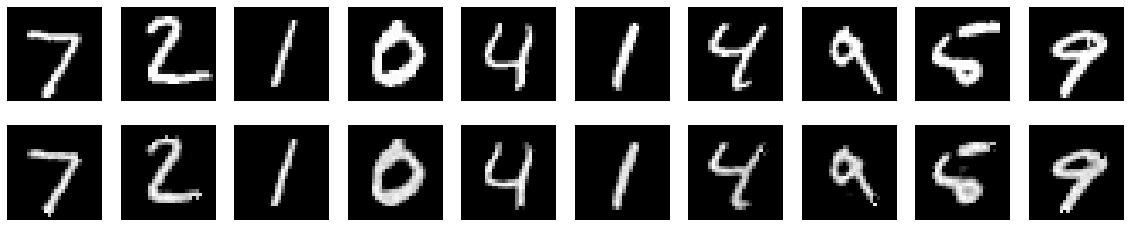

In [126]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
model.save("model_fully_connected.h5")

In [0]:
from google.colab import files
files.download("model_fully_connected.h5")